# MT Penetration Depth Profiles over 2DLine and 3DGrid

In [1]:
import sys 
import os
import glob
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl


mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

mpl.rcParams['figure.figsize']=[20,10]

import mtpy.core.mt as mt
import mtpy.modeling.occam2d_rewrite as occam2d_new


INFO:root:module file: /Softlab/Githubz/mtpy2/mtpy/utils/mtpylog.pyc
INFO:root:Effective yaml configuration file /Softlab/Githubz/mtpy2/mtpy/utils/logging.yml


In [50]:
# edi_dir="E:/Githubz/mtpy2/tests/data/edifiles/"

edi_dir="/Softlab/Githubz/mtpy2/tests/data/edifiles/"

#edi_dir="/Softlab/Githubz/mtpy2/examples/data/edi2"  #edi_files/"

edifiles = glob.glob(os.path.join(edi_dir, '*.edi'))

print (edifiles)

['/Softlab/Githubz/mtpy2/tests/data/edifiles/15130A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/15127A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/16127A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/16125A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/15128A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/15125A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/16123A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/15129A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/16124A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/16126A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/16122A.edi', '/Softlab/Githubz/mtpy2/tests/data/edifiles/15126A.edi']


Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq array to know which index of the PT array corresponds to which freq.
Should input a freq a

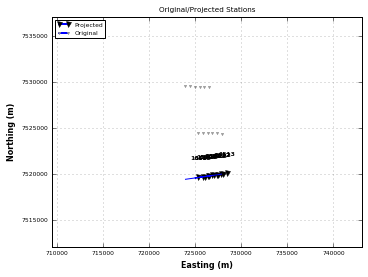

In [51]:
# stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
# pr = occam2d_new.Profile(edi_path=edi_dir, station_list=stations)

pr = occam2d_new.Profile(edi_path=edi_dir)
pr.generate_profile()
# set station labels to only be from 1st to 4th index 
# of station name
      
pr.plot_profile(station_id=[0,4])

In [52]:
 pr.station_locations

array([    0.        ,   478.83292003,   675.24333872,  1027.83734907,
        1172.79154629,  1518.89335461,  1666.42259118,  1995.80961378,
        2166.7956371 ,  2489.21181362,  2649.15965681,  3144.2642754 ])

In [53]:
pr.edi_list

In [54]:
# See http://localhost:8888/notebooks/examples/notebooks/Apparent_Resistivity_Penetration_Depth.ipynb
# def plotbar_pen_depth(per_index, edifiles):

per_index=2
    
scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))

#per_index=0,1,2,....    
periods=[] 

app_resis=[]

stations=[]
    
for mt_obj in pr.edi_list:

    # the attribute Z
    zeta=mt_obj.Z
    

    if per_index>=len(zeta.freq):
        raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")

    per=1.0/zeta.freq[per_index]
    periods.append(per)

    penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
    app_resis.append(penetration_depth)

    stations.append(mt_obj.station)
    

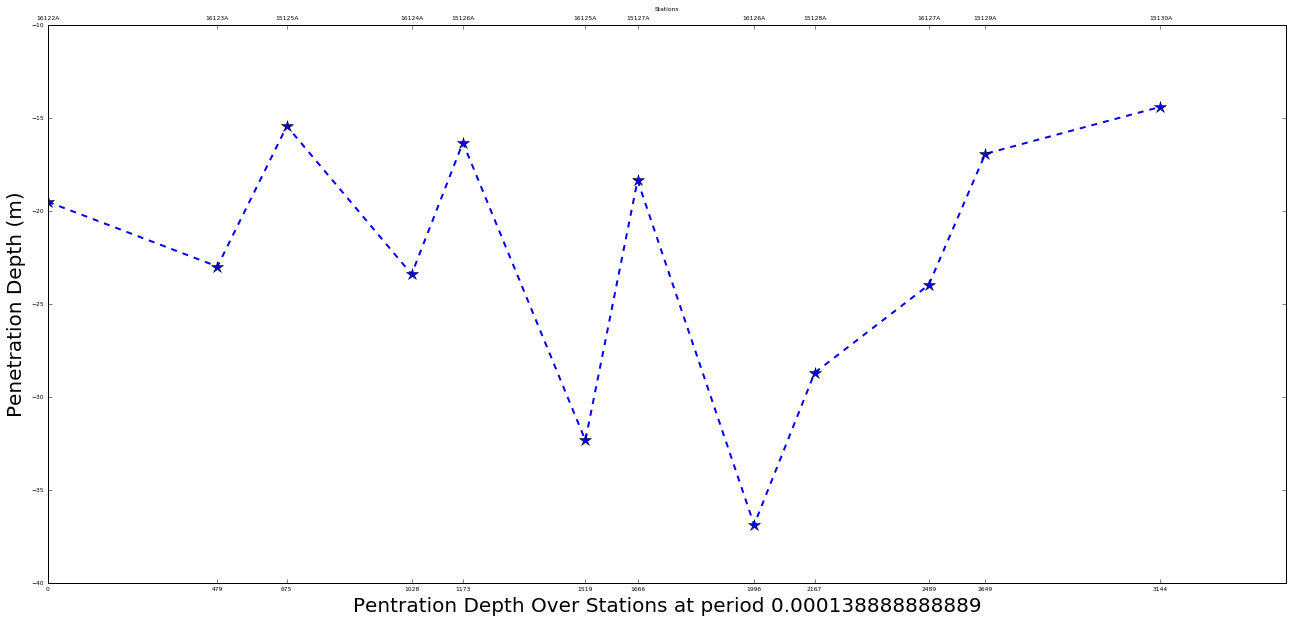

In [55]:

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


#plt.bar(index, app_resis, color='#000000')
ax1.plot(pr.station_locations, app_resis, '--*', markersize="12", linewidth="2", label="Penetration Depth")
# plt.xaxis.tick_top()
# plt.set_xlabel('X LABEL')    
# plt.xaxis.set_label_position('top') 

ax1.set_xlabel('Pentration Depth Over Stations at period %s'%periods[0],fontsize=20)
ax1.set_xticks(pr.station_locations)
ax1.set_ylabel('Penetration Depth (m)', fontsize=20)


ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(pr.station_locations)
ax2.set_xticklabels(stations)
ax2.set_xlabel(r"Stations")

#plt.show()

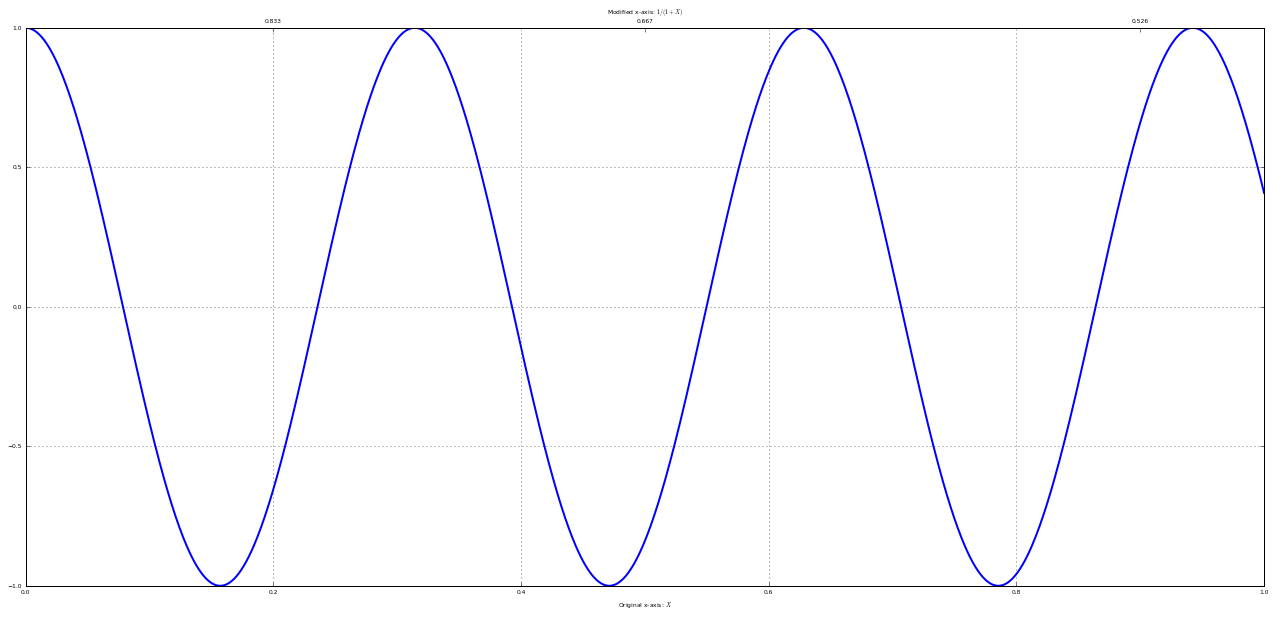

In [56]:
#http://stackoverflow.com/questions/10514315/how-to-add-a-second-x-axis-in-matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

X = np.linspace(0,1,1000)
Y = np.cos(X*20)

ax1.plot(X,Y)
ax1.set_xlabel(r"Original x-axis: $X$")
ax1.grid(True)
new_tick_locations = np.array([.2, .5, .9])

def tick_function(X):
    V = 1/(1+X)
    return ["%.3f" % z for z in V]

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Modified x-axis: $1/(1+X)$")

plt.show()


In [57]:
# plt.plot?

#plt.legend?

#plt.xticks?
#OR
help(plt.xticks)

Help on function xticks in module matplotlib.pyplot:

xticks(*args, **kwargs)
    Get or set the *x*-limits of the current tick locations and labels.
    
    ::
    
      # return locs, labels where locs is an array of tick locations and
      # labels is an array of tick labels.
      locs, labels = xticks()
    
      # set the locations of the xticks
      xticks( arange(6) )
    
      # set the locations and labels of the xticks
      xticks( arange(5), ('Tom', 'Dick', 'Harry', 'Sally', 'Sue') )
    
    The keyword args, if any, are :class:`~matplotlib.text.Text`
    properties. For example, to rotate long labels::
    
      xticks( arange(12), calendar.month_name[1:13], rotation=17 )



Rotated Z and Tipper to align with +45.00 degrees E of N
Profile angle is +135.00 degrees E of N


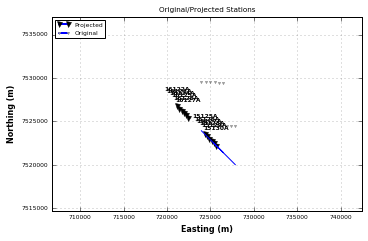

In [58]:
pr.geoelectric_strike = 45 # preset a rotation angle

pr.generate_profile()

pr.plot_profile()

In [59]:
stations = ['151{0:02}A'.format(s) for s in range(24, 31)]
stations

['15124A', '15125A', '15126A', '15127A', '15128A', '15129A', '15130A']

# 3D-plot penetration depth profile over stations

    - For a given fre/per index of a set of edifiles, the (lat, lon) are extracted and bounding box calculated.
    - A pmesh is made with None value initially for all pixels, reset the pixels value according to the MT station pen-depth. 
    - Finally show the pcolor plot

In [60]:
def get_penetration_depth(per_index, edifiles):
    """ input period index and a list of edi files,
    return tuple of lists (stations, periods, penetrationdepth, lat-lons-pairs)
    """
    
    scale_param = np.sqrt(1.0 / (2.0 * np.pi * 4 * np.pi * 10 ** (-7)))
    
    #per_index=0,1,2,....    
    periods=[] 
    
    pendep=[]
    
    stations=[]
    
    latlons=[]
    
    for afile in edifiles:
        mt_obj = mt.MT(afile)
        
        latlons.append((mt_obj.lat, mt_obj.lon))
        
    
        # the attribute Z
        zeta=mt_obj.Z
        
        if per_index>=len(zeta.freq):
            raise Exception("Index out_of_range Error: period index must be less than number of periods in zeta.freq")
        
        per=1.0/zeta.freq[per_index]
        periods.append(per)
       
        penetration_depth = - scale_param * np.sqrt(zeta.resistivity[per_index, 0, 1] * per)
        pendep.append(penetration_depth)
        
        stations.append(mt_obj.station)
        

    return (stations,periods,pendep, latlons )

In [61]:
(stations,periods,pendep, latlons )=get_penetration_depth(10, edifiles)

In [62]:
stations

['15130A',
 '15127A',
 '16127A',
 '16125A',
 '15128A',
 '15125A',
 '16123A',
 '15129A',
 '16124A',
 '16126A',
 '16122A',
 '15126A']

In [63]:
periods  # All must be of the same value across stations

[0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556,
 0.00055555555555555556]

In [64]:
pendep

[-12.956744674787281,
 -27.70824709432717,
 -23.738182448903824,
 -15.989009709988009,
 -9.2120301456684768,
 -33.344297497214612,
 -48.246781803959571,
 -40.552708760558225,
 -39.005317981584653,
 -41.028663961425231,
 -36.831338298147372,
 -44.019710692880871]

In [65]:
latlons

[(-22.371222222222222, 149.21297222222222),
 (-22.37102777777778, 149.19841666666667),
 (-22.325888888888887, 149.1988611111111),
 (-22.32575, 149.18930555555556),
 (-22.37086111111111, 149.20330555555554),
 (-22.370805555555556, 149.1886388888889),
 (-22.325555555555557, 149.17905555555555),
 (-22.371083333333335, 149.20808333333332),
 (-22.325694444444444, 149.18447222222224),
 (-22.325805555555554, 149.19400000000002),
 (-22.32561111111111, 149.1743611111111),
 (-22.37063888888889, 149.1935)]

In [66]:
def get_bounding_box(latlons):
    """ get min max lat lon from the list of lat-lon-pairs points"""
    lats=[tup[0] for tup in latlons]
    lons=[tup[1] for tup in latlons]

    minlat=min(lats)
    maxlat=max(lats)

    print(minlat, maxlat)

    minlon= min(lons)
    maxlon= max(lons)

    print(minlon, maxlon)
    
    return ((minlon,maxlon), (minlat, maxlat))

In [67]:
bbox=get_bounding_box(latlons)

(-22.371222222222222, -22.325555555555557)
(149.1743611111111, 149.21297222222222)


In [68]:
bbox

((149.1743611111111, 149.21297222222222),
 (-22.371222222222222, -22.325555555555557))

In [69]:
xgrids= bbox[0][1] - bbox[0][0]
ygrids= bbox[1][1] - bbox[1][0]

print(xgrids, ygrids)


pixelsize=0.001  #degree 0.001= 100meters, 1 deg=100km 

nx= int(np.ceil(xgrids/pixelsize))
ny= int(np.ceil(ygrids/pixelsize))


print(nx, ny)

(0.038611111111123364, 0.045666666666665634)
(39, 46)


In [70]:
# make an image bigger than the (nx, ny)   
pad=2

nx2= nx + pad
ny2= ny+ pad

# Z = 0.0* np.random.random((nx2,ny2))   # Test data
# Z=  np.ones((nx2,ny2))
zdep=   np.zeros((nx2,ny2))
# Z[10, 10]=12
# Z[11, 20]=20
# Z[13, 15]=30

zdep[:,:]=np.nan

zdep.shape

(41, 48)

In [71]:
offset=1
minlat= bbox[1][0]
minlon= bbox[0][0]
LL_lat= minlat -offset*pixelsize
LL_lon= minlon -offset*pixelsize

# UR_lat=maxlat + offset*pixelsize
# UR_lon= maxlon + offset*pixelsize

def get_index(lat, lon):
    index_x = (lon - LL_lon)/pixelsize
    index_y= (lat-LL_lat)/pixelsize
    
    print (int(index_x), int(index_y))
    
    return(int(index_x), int(index_y))


In [72]:
for iter, pair in enumerate(latlons):
    print pair
    (xi,yi)= get_index(pair[0], pair[1])
    zdep[xi,yi] = np.abs(pendep[iter])

(-22.371222222222222, 149.21297222222222)
(39, 1)
(-22.37102777777778, 149.19841666666667)
(25, 1)
(-22.325888888888887, 149.1988611111111)
(25, 46)
(-22.32575, 149.18930555555556)
(15, 46)
(-22.37086111111111, 149.20330555555554)
(29, 1)
(-22.370805555555556, 149.1886388888889)
(15, 1)
(-22.325555555555557, 149.17905555555555)
(5, 46)
(-22.371083333333335, 149.20808333333332)
(34, 1)
(-22.325694444444444, 149.18447222222224)
(11, 46)
(-22.325805555555554, 149.19400000000002)
(20, 46)
(-22.32561111111111, 149.1743611111111)
(1, 46)
(-22.37063888888889, 149.1935)
(20, 1)


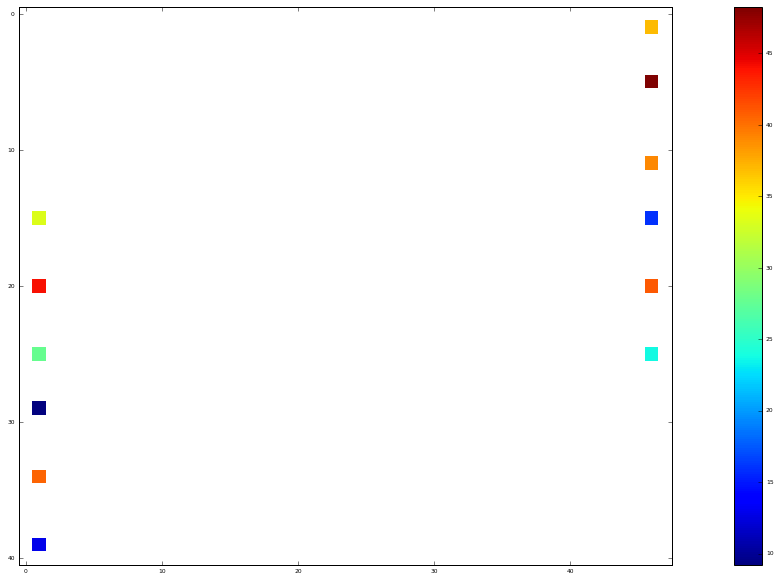

In [73]:
plt.imshow(zdep,  interpolation='none')
plt.colorbar()

In [75]:
1) why lat-lon orient not right?

2) interpolation? image pixels

SyntaxError: invalid syntax (<ipython-input-75-9662445655ca>, line 3)